In [81]:
import matplotlib.pyplot as plt
import struct
import numpy as np
import os
import matplotlib.image as mpimg

In [82]:
with open("debug_pixels/a_samples.bin", "rb") as fin:
  samples_cnt = struct.unpack("i", fin.read(4))[0]
  samples = np.array(struct.unpack("f" * samples_cnt * 2, fin.read(4 * samples_cnt * 2))).reshape(samples_cnt, 2)
  print("samples.size() = ", len(samples))
  height, width = struct.unpack("ii", fin.read(4 * 2))
  print(height, width)
  pixels = np.array(struct.unpack("i" * height * width, fin.read(4 * height * width))).reshape(height, width)

class PixelData:
  def __init__(self, filename, x, y):
    self.lines = []
    self.labels = np.array([0] * samples_cnt)
    if not os.path.exists(filename):
      self.labels = np.array([pixels[y, x] for _ in range(samples_cnt)])
      return 
    with open(filename, "rb") as fin:
      linesNum = struct.unpack("i", fin.read(4))[0]
      self.lines =[
        struct.unpack("f" * 3, fin.read(4 * 3))
        for _ in range(linesNum)
      ]
      self.labels = np.array(struct.unpack("i" * samples_cnt, fin.read(4 * samples_cnt))) 


samples.size() =  256
1024 1024


In [83]:
#center_x,center_y = 418,153
center_x,center_y = 417,148
#center_x,center_y = 568,615 # bunny

half_window = 2

coords = [
    [(x,y) for x in range(center_x - half_window, center_x + half_window + 1)] 
           for y in range(center_y - half_window, center_y + half_window + 1)
]

pixelsToOpen = [
    [
        ("debug_pixels/pix_{}_{}.bin".format("0" * (4 - len(str(x))) + str(x), "0" * (4 - len(str(y))) + str(y)), x, y)
        for x in range(center_x - half_window, center_x + half_window + 1)
    ]
    for y in range(center_y - half_window, center_y + half_window + 1)
]

pixels = [[PixelData(*p) for p in pixelLine] for pixelLine in pixelsToOpen]

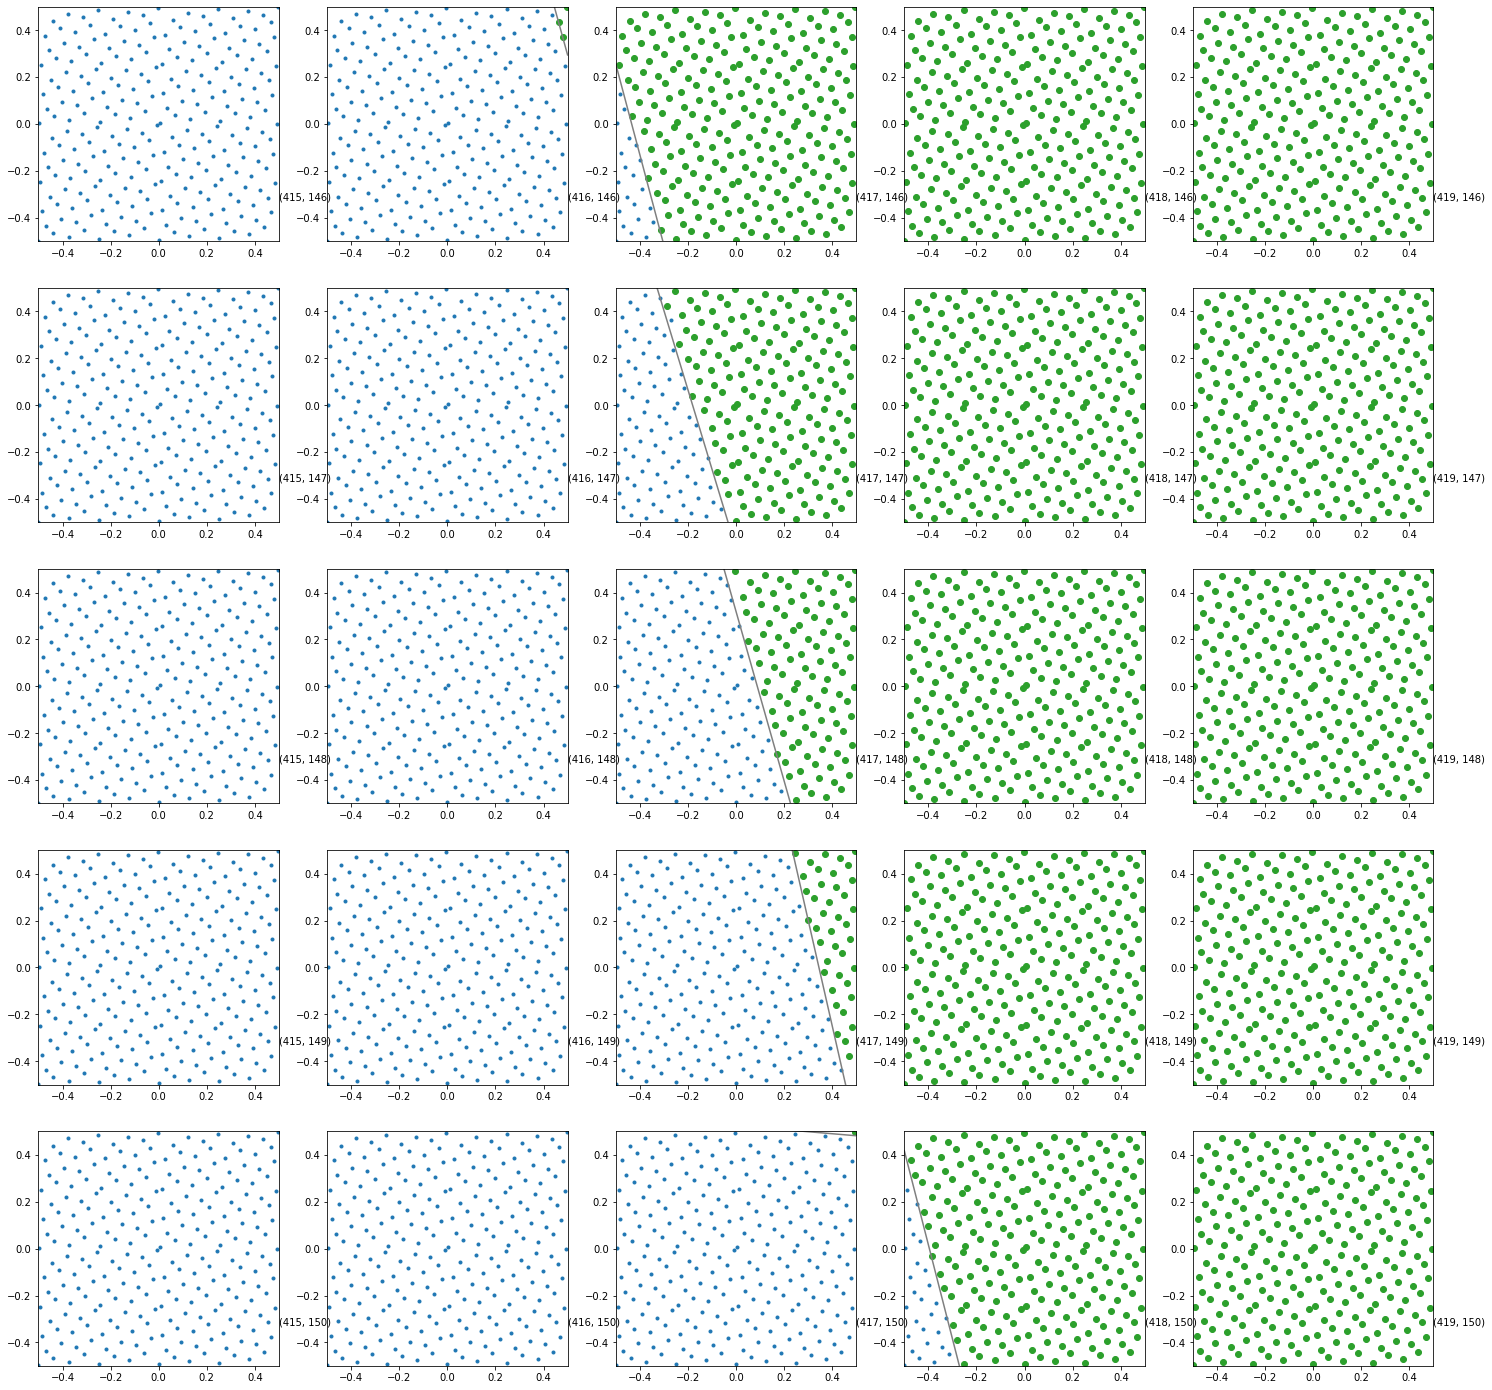

In [84]:
fig = plt.figure(figsize=(5 * len(pixels[0]), 5 * len(pixels)))

labels = ".*ov^<>12348spPhH"

idx = 0
for (pix_line,line) in zip(reversed(pixels), reversed(coords)):
    for (pixel,coords) in zip(reversed(pix_line), reversed(line)):
        ax = fig.add_subplot(len(pixels), len(pix_line), len(pixels) * len(pix_line) - idx)
        radius = 0.5
        plt.xlim(-radius, radius)
        plt.ylim(-radius, radius)
        ax.annotate(str(coords), xy=(0.5, -0.325))
        for label_id, label in enumerate(labels):
            ax.plot(samples[pixel.labels == label_id][:, 0], samples[pixel.labels == label_id][:, 1], label)

        # Uncomment to annotate samples
        # for i in range(len(samples)):
        #     plt.annotate(str(i), samples[i], textcoords="offset points", xytext=(0,8),ha='center')
        for l in pixel.lines:
            x = np.linspace(-radius, radius)
            plt.plot(x, -(l[0] / l[1] * x + l[2] / l[1]))
        idx += 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.6627451


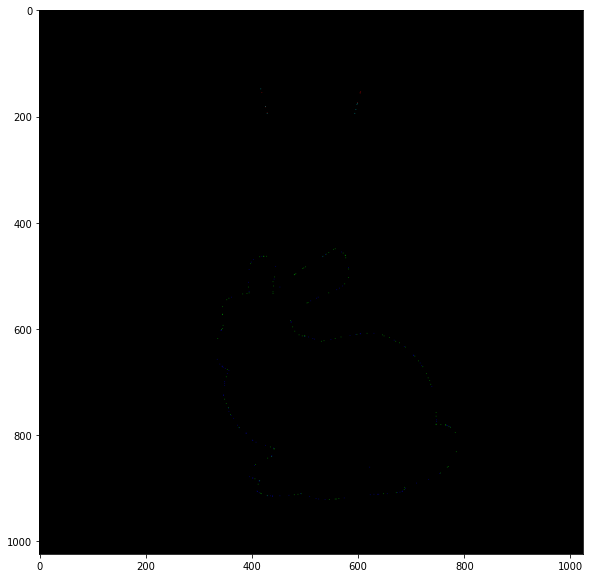

In [87]:
bsp_img = mpimg.imread("02_output_antialiased_bsp.png")# [100:200, 400:500]
ref_img = mpimg.imread("01_output_antialiased.png")# [100:200, 400:500]
plt.figure(figsize=(10, 10))
plt.imshow((ref_img - bsp_img)[:, :, :3] * 200)
print(np.abs((ref_img - bsp_img)).max())

In [46]:
3525050 // 1024, 3525050 % 1024

(1147, 488)